### 1. Notwendige Bibliotheken importieren

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Titanic-Datensatz laden

In [ ]:
df = sns.load_dataset('titanic')

### 3. EDA: Erste Datenübersicht

In [ ]:
df.head(10)

#### 4. Describe-Funktion: 
##### Mit der Funktion lassen wir uns einfach statistische Werte wie Durchschnitt, Standardabweichungen usw. ausgeben

In [ ]:
df.describe()

#### 5. .info: Allgemeine Informationen zum Datensatz
##### Es zeigt uns welcher Datentyp sich in jeder Spalte verbirgt und wie viele Daten fehlen

In [ ]:
df.info()

##### Hier kann man gut erkennen das einige interessante Daten nicht vollständig sind.
- 177 Altersangaben (age)
- 3 mal eingeschiffte Personen (embarked) sowie die dazu gehörige Stadt (embark_twon) 
- 688 mal die Decknummer (deck) der Passagiere

#### 6. Die vorhanden Daten bereinigen und die Informationen aus dem src ziehen
##### Die Daten vor der Bereinigung

In [ ]:
import sys
sys.path.append("../src")  # Den Ordner "src" zum Python-Pfad hinzufügen

from datenvorbereitung import lade_titanic_daten, bereinige_daten, vergleiche_daten

# Originaldaten laden
df_original = lade_titanic_daten()

# Bereinigte Daten erhalten
df_bereinigt = bereinige_daten(df_original)

# Unterschiede anzeigen
vergleiche_daten(df_original, df_bereinigt)

# Erste Zeilen ausgeben, um den Vergleich visuell zu überprüfen
df_original.head(10)

##### Die Daten nach der Bereinigung

In [ ]:
df_bereinigt.head(10)

##### Entfernte Spalten und Begründung

| **Spalte**      | **Grund für Entfernung** |
|----------------|----------------------|
| `embark_town`  | Redundant – die Spalte `embarked` enthält bereits die gleiche Information in kompakter Form (C, Q, S). |
| `alive`        | Redundant – die Spalte `survived` enthält bereits die Überlebensinformationen (1 = überlebt, 0 = nicht überlebt). |
| `deck`         | Viele fehlende Werte – enthält sehr viele `NaN`-Werte, sodass die Information nicht zuverlässig genutzt werden kann. |
| `class`        | Redundant – `pclass` enthält bereits die gleiche Information numerisch (1, 2, 3 statt "First", "Second", "Third"). |
| `sex`          | Ersetzt `who`, um zwischen Kindern und Erwachsenen zu unterscheiden ("man", "woman", "child"). |
| `adult_male`   | Redundant – Diese Information kann bereits aus `who` abgeleitet werden und ist nicht relevant. |
| `alone`        | Redundant – Diese Information kann aus `sibsp` (Anzahl Geschwister/Ehepartner) und `parch` (Anzahl Eltern/Kinder) berechnet werden. |

#### 7. Überlebensrate auf der Titanic
##### Prozentualer Anteil der Überlebenen

In [ ]:
survival_counts = df_bereinigt['survived'].value_counts()
survival_rate = (survival_counts[1] / survival_counts.sum()) * 100

print(f"Die Gesamtüberlebensrate beträgt: {survival_rate:.2f}%")

##### ❌ Generelle Überlebensrate (muss überarbeitet werden, daten aus dem src ziehen und diagramm aus dem results laden)

In [ ]:
plt.figure(figsize=(6,4))
bars = plt.bar(['Nicht Überlebt', 'Überlebt'], [df_bereinigt['survived'].value_counts()[0], df_bereinigt['survived'].value_counts()[1]], color=['red', 'green'])
plt.xticks(['Nicht Überlebt', 'Überlebt'])
plt.ylabel("Anzahl")
plt.title("Überlebensrate")

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\survival_rate.png')

plt.show()


##### ❌ Visualisierung der Überlebensrate nach Geschlecht (muss überarbeitet werden, daten aus dem src ziehen und diagramm aus dem results laden)

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(["Mann", "Frau"], [df.groupby("sex")["survived"].mean()["male"],df.groupby("sex")["survived"].mean()["female"]], color= ["skyblue","violet"])
plt.title('Überlebensrate nach Geschlecht')

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\survival_rate_by_gender.png')

# Diagramm schließen
plt.show()

##### ❌ Visualisierung der Überlebensrate nach Passagierklasse (muss überarbeitet werden, daten aus dem src ziehen und diagramm aus dem results laden)

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Überlebensrate nach Passagierklasse')

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\survival_rate_by_class.png')

# Diagramm schließen
plt.show()

##### ❌ Visualisierung der Überlebensrate nach Alter (muss überarbeitet werden, daten aus dem src ziehen und diagramm aus dem results laden)

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['survived'] == 1]['age'], kde=True, color='green', label='Überlebt', stat='density')
sns.histplot(df[df['survived'] == 0]['age'], kde=True, color='red', label='Nicht überlebt', stat='density')
plt.title('Überlebensrate nach Alter')
plt.xlabel('Alter')
plt.ylabel('Dichte')
plt.legend()

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\/survival_rate_by_age.png')

# Diagramm schließen
plt.show()

In [ ]:
grouped_alive_df = df_bereinigt.groupby(['pclass'])['survived'].count()
                          # (array([0, 1, 2, 3, 4, 5]),
                          #  [Text(0, 0, '(1, 0)'),
                          #   Text(1, 0, '(1, 1)'),
                          #   Text(2, 0, '(2, 0)'),
                          #   Text(3, 0, '(2, 1)'),
                          #   Text(4, 0, '(3, 0)'),
                          #   Text(5, 0, '(3, 1)')])
# grouped_alive_df = df.groupby(['survived', 'pclass'])['pclass'].count().unstack()
                  # (array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])
grouped_alive_df.plot(kind="pie", colors=['yellow', 'grey', 'orange'], figsize=(20,12), subplots=True, shadow=True);
plt.title('Überlebende nach Passagierklassen', fontsize=22)
plt.xlabel('Passagierklassen', fontsize=22)
plt.ylabel(ylabel='Anzahl', loc='center', fontsize=22, rotation=0)
# plt.tick_params(axis='y')
plt.xticks(rotation=0)
plt.yticks(rotation=0);
plt.legend(['1', '2', '3'])
# (array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

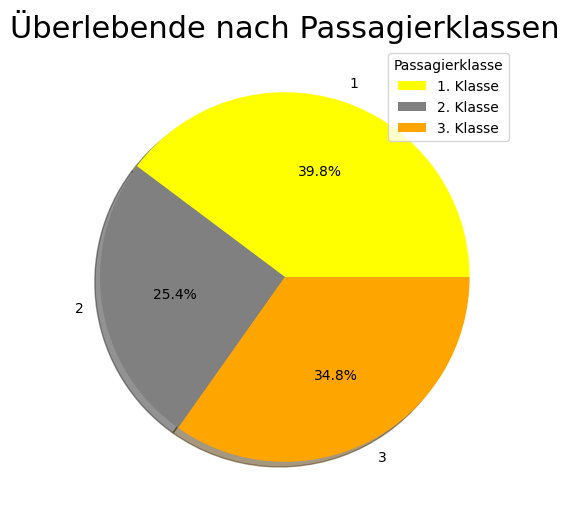

In [ ]:
import matplotlib.pyplot as plt

# Gruppierung nach Passagierklasse und Summe der Überlebenden
grouped_alive_df = df_bereinigt.groupby('pclass')['survived'].sum()

# Erstellen des Kreisdiagramms
plt.figure(figsize=(10, 6))
grouped_alive_df.plot(kind="pie", colors=['yellow', 'grey', 'orange'], shadow=True, autopct='%1.1f%%')

# Titel und Labels
plt.title('Überlebende nach Passagierklassen', fontsize=22)
plt.ylabel('')  # Entfernt die Y-Achsenbeschriftung, da sie bei einem Kreisdiagramm unnötig ist
plt.legend(title='Passagierklasse', labels=['1. Klasse', '2. Klasse', '3. Klasse'])

# Diagramm anzeigen
plt.show()